## The Spark Foundation Group - Task 4


### EDA - Terrorism

###### Impoerting the Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [37]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding = 'iso-8859-1')

C:\Users\Lakshay Tyagi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [39]:
df.shape

(181691, 135)

##### All coloumns

In [40]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [41]:
sel_col = ['eventid','iyear',
 'country_txt','region_txt','provstate', 'city','latitude','longitude','success','attacktype1_txt',
 'targtype1_txt','weaptype1_txt','nkill','nwound','gname']

###### Selected columns for EDA

In [42]:
sel_col

['eventid',
 'iyear',
 'country_txt',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'success',
 'attacktype1_txt',
 'targtype1_txt',
 'weaptype1_txt',
 'nkill',
 'nwound',
 'gname']

In [43]:
sel_data = df[sel_col]

In [44]:
sel_data.shape

(181691, 15)

In [45]:
sel_data.columns  = ['Id','Year','country','region','provstate','city','latitude','longitude','success','attacktype',
 'target_type','weapon_type','kill','wounded','Terrorist group']

In [46]:
sel_data.head(5)

,Id,Year,country,region,provstate,city,latitude,longitude,success,attacktype,target_type,weapon_type,kill,wounded,Terrorist group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,Unknown


##### These are the important selected columns which have information for the Analysis of Terrorism

In [47]:
sel_data.shape

(181691, 15)

In [48]:

sel_data.dtypes

Id                   int64
Year                 int64
country             object
region              object
provstate           object
city                object
latitude           float64
longitude          float64
success              int64
attacktype          object
target_type         object
weapon_type         object
kill               float64
wounded            float64
Terrorist group     object
dtype: object

In [49]:

a = sel_data.isnull().sum()

In [50]:
a

Id                     0
Year                   0
country                0
region                 0
provstate            421
city                 434
latitude            4556
longitude           4557
success                0
attacktype             0
target_type            0
weapon_type            0
kill               10313
wounded            16311
Terrorist group        0
dtype: int64

##### Some columns have high misssing value , so we will do  general Analysis on the non missing values columns

#### selecting those columns which have non - missisng values

In [51]:
final_col = [keys for keys in dict(sel_data.isnull().sum()) if dict(sel_data.isnull().sum())[keys] in [0]]

In [52]:
final_col

['Id',
 'Year',
 'country',
 'region',
 'success',
 'attacktype',
 'target_type',
 'weapon_type',
 'Terrorist group']

In [53]:
sel_data[final_col].shape

(181691, 9)

In [54]:
sel_data.head(2)

,Id,Year,country,region,provstate,city,latitude,longitude,success,attacktype,target_type,weapon_type,kill,wounded,Terrorist group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League


In [55]:
final_data = sel_data[final_col]

### Analysis

In [56]:
c = final_data.groupby('Year').count()['Id']

Text(0, 0.5, 'No of attacks')

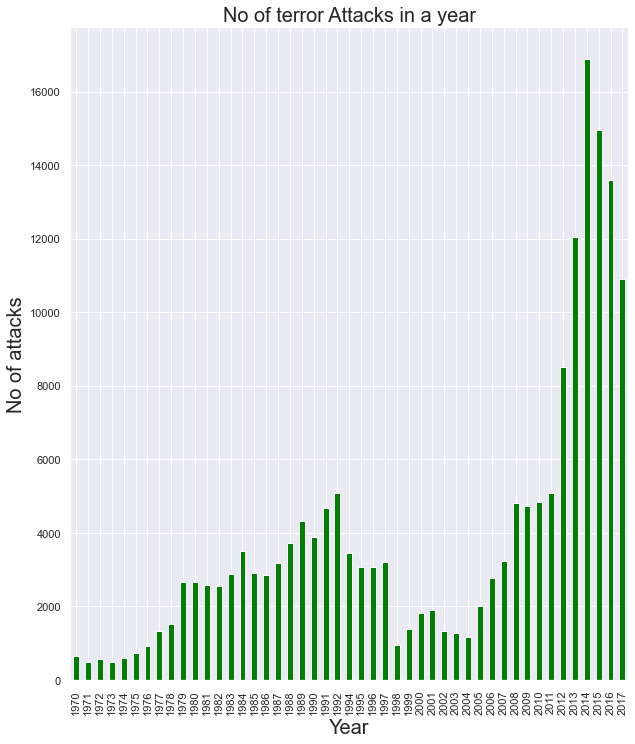

In [57]:
sns.set()
plt.figure(figsize = (10,12))
c.plot(kind = 'bar', color = 'green')
plt.title('No of terror Attacks in a year', fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('No of attacks',fontsize = 20)

######  Highest number of terror attacks is in 2014

<AxesSubplot:xlabel='region'>

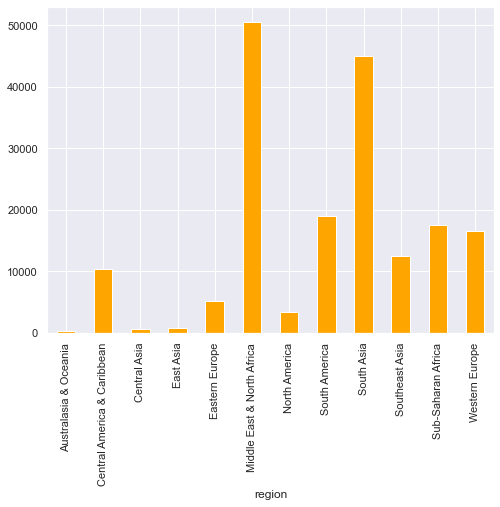

In [58]:
ca = final_data.groupby('region').count()['Id']
plt.figure(figsize = (8,6))
ca.plot(kind = 'bar', color = 'orange')

#### Middle east & north Africa  and South Asia are the most affected area

<AxesSubplot:xlabel='region'>

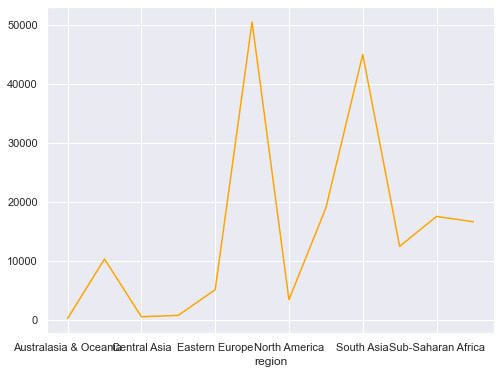

In [59]:
ca = final_data.groupby('region').count()['Id']
plt.figure(figsize = (8,6))
ca.plot(kind = 'line', color = 'orange')

Text(0.5, 1.0, 'No of attacks Region wise')

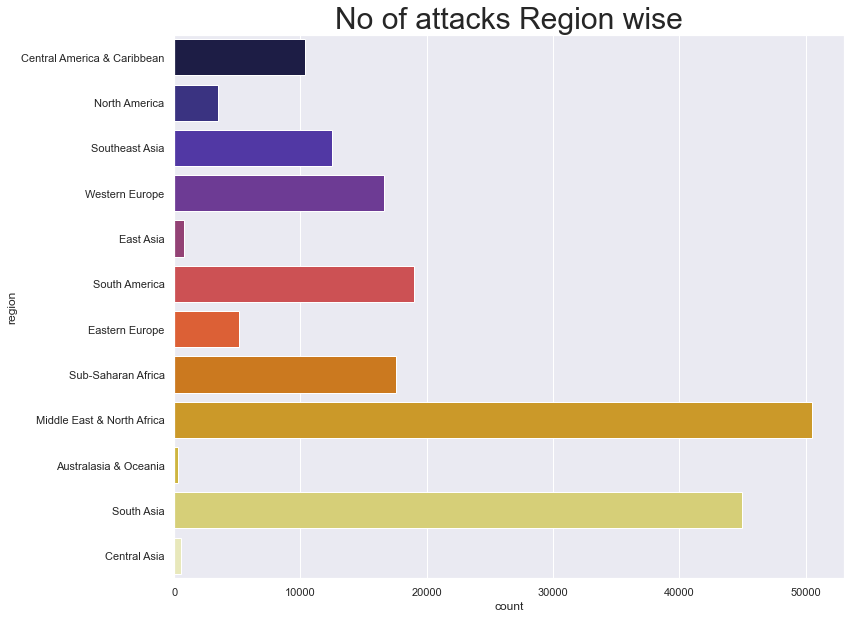

In [60]:
plt.figure(figsize = (12,10))
sns.countplot(y = 'region', data = final_data, palette = 'CMRmap')
plt.title('No of attacks Region wise', fontsize = 30)

In [61]:
final_data.head()

,Id,Year,country,region,success,attacktype,target_type,weapon_type,Terrorist group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,1,Assassination,Private Citizens & Property,Unknown,MANO-D
1,197000000002,1970,Mexico,North America,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,1,Assassination,Journalists & Media,Unknown,Unknown
3,197001000002,1970,Greece,Western Europe,1,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown
4,197001000003,1970,Japan,East Asia,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown


Text(0.5, 1.0, 'Type of Attack')

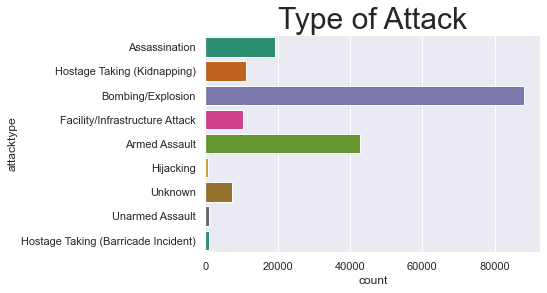

In [62]:
sns.countplot(y = 'attacktype', data = final_data, palette = 'Dark2')
plt.title('Type of Attack', fontsize = 30)

Text(0.5, 1.0, 'Target Type')

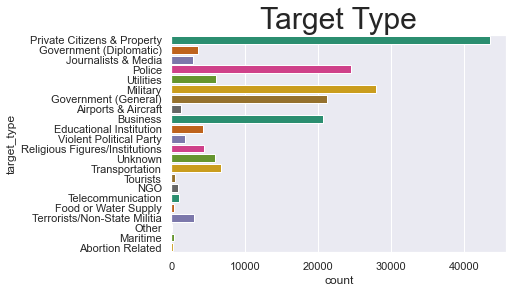

In [63]:
sns.countplot(y = 'target_type', data = final_data, palette = 'Dark2')
plt.title('Target Type', fontsize = 30)

In [64]:
final_data.head(2)

,Id,Year,country,region,success,attacktype,target_type,weapon_type,Terrorist group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,1,Assassination,Private Citizens & Property,Unknown,MANO-D
1,197000000002,1970,Mexico,North America,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League


<AxesSubplot:>

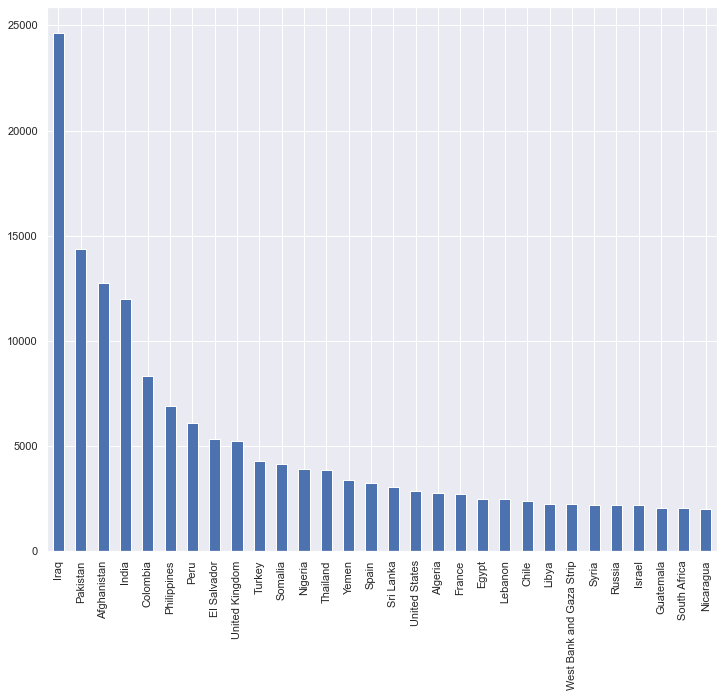

In [65]:
c = final_data['country'].value_counts().head(30)
plt.figure(figsize = (12,10))
c.plot(kind = 'bar')  ### countries with the most terrorist attack

In [66]:
final_data.head(5)

,Id,Year,country,region,success,attacktype,target_type,weapon_type,Terrorist group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,1,Assassination,Private Citizens & Property,Unknown,MANO-D
1,197000000002,1970,Mexico,North America,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,1,Assassination,Journalists & Media,Unknown,Unknown
3,197001000002,1970,Greece,Western Europe,1,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown
4,197001000003,1970,Japan,East Asia,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown


<AxesSubplot:xlabel='count', ylabel='country'>

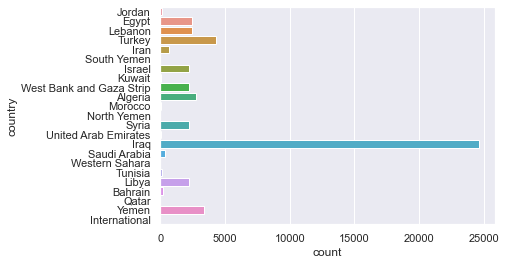

In [67]:
c = final_data[final_data['region'] == 'Middle East & North Africa']
sns.countplot(y ='country', data = c)


<AxesSubplot:xlabel='count', ylabel='country'>

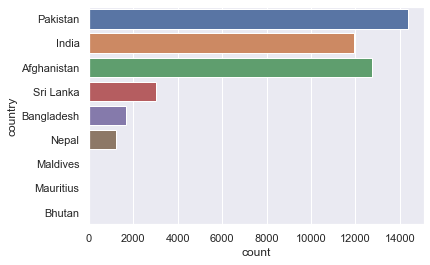

In [68]:
c = final_data[final_data['region'] == 'South Asia']
sns.countplot(y ='country', data = c)

In [69]:
final_data.head()

,Id,Year,country,region,success,attacktype,target_type,weapon_type,Terrorist group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,1,Assassination,Private Citizens & Property,Unknown,MANO-D
1,197000000002,1970,Mexico,North America,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,1,Assassination,Journalists & Media,Unknown,Unknown
3,197001000002,1970,Greece,Western Europe,1,Bombing/Explosion,Government (Diplomatic),Explosives,Unknown
4,197001000003,1970,Japan,East Asia,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,Unknown


In [70]:
c['Terrorist group'].value_counts().head(10)

Unknown                                           21913
Taliban                                            7477
Communist Party of India - Maoist (CPI-Maoist)     1878
Maoists                                            1625
Liberation Tigers of Tamil Eelam (LTTE)            1604
Tehrik-i-Taliban Pakistan (TTP)                    1350
Sikh Extremists                                     712
People's Liberation Front (JVP)                     433
United Liberation Front of Assam (ULFA)             357
Khorasan Chapter of the Islamic State               343
Name: Terrorist group, dtype: int64

In [71]:
final_data.head(2)

,Id,Year,country,region,success,attacktype,target_type,weapon_type,Terrorist group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,1,Assassination,Private Citizens & Property,Unknown,MANO-D
1,197000000002,1970,Mexico,North America,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League


In [72]:
final_data['weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [73]:
final_data['weapon_type'] = final_data['weapon_type'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], 'Vehicle')

<ipython-input-73-b619466ea14f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['weapon_type'] = final_data['weapon_type'].replace(['Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'], 'Vehicle')


In [74]:
final_data['weapon_type'].value_counts()

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: weapon_type, dtype: int64

In [75]:
d = final_data['weapon_type'].value_counts()

Text(0.5, 1.0, 'Weapon Type')

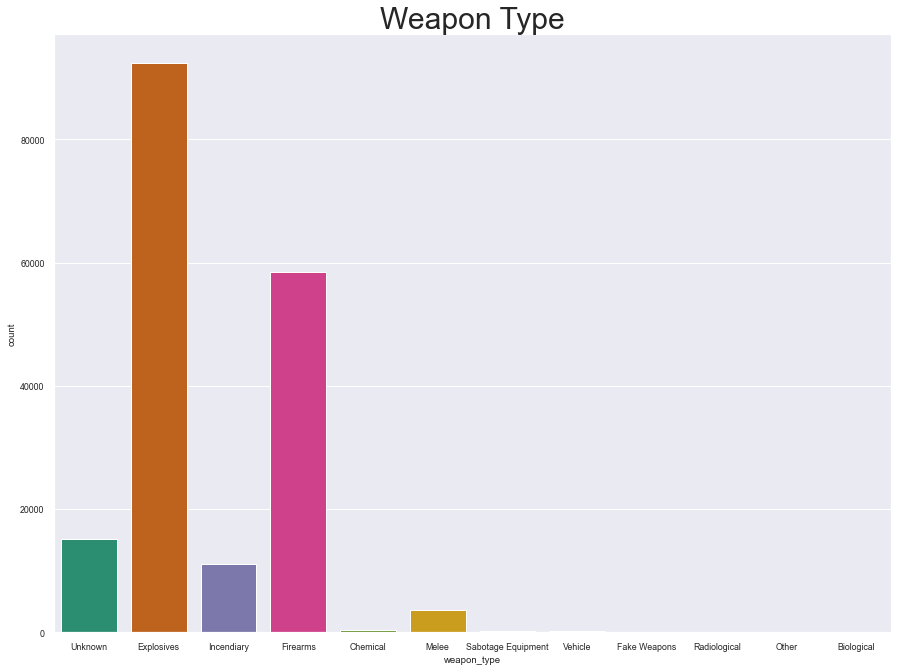

In [76]:
plt.figure(figsize = (15,11))
sns.set(font_scale = 0.8)
sns.countplot(x = 'weapon_type', data = final_data, palette = 'Dark2')
plt.title('Weapon Type', fontsize = 30)

In [77]:
d

Explosives            92426
Firearms              58524
Unknown               15157
Incendiary            11135
Melee                  3655
Chemical                321
Sabotage Equipment      141
Vehicle                 136
Other                   114
Biological               35
Fake Weapons             33
Radiological             14
Name: weapon_type, dtype: int64

array([<AxesSubplot:ylabel='weapon_type'>], dtype=object)

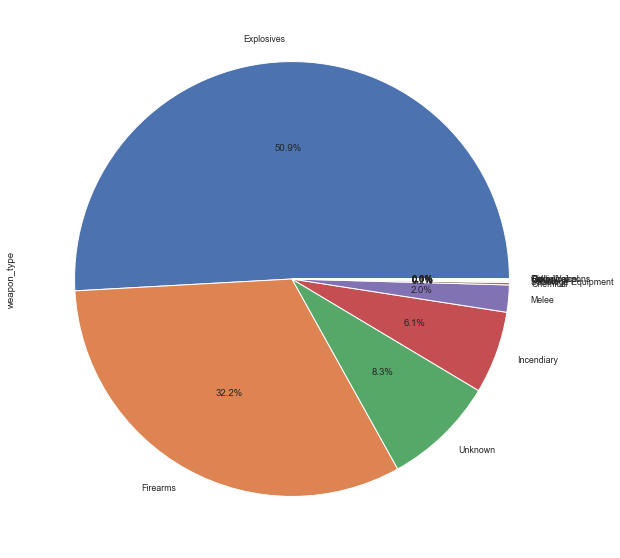

In [78]:
plt.figure(figsize = (14,10))
d.plot(kind = 'pie', subplots = True, autopct = '%1.1f%%') 

#### Pie chart is not proper visible but according to the percentage
#### Explosives used more than 50 pecent

In [79]:
sel_data.shape

(181691, 15)

In [80]:
sel_data['region'].value_counts().count()

12

In [81]:
sel_data.head(2)

,Id,Year,country,region,provstate,city,latitude,longitude,success,attacktype,target_type,weapon_type,kill,wounded,Terrorist group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League


In [82]:
abc = pd.crosstab(index = sel_data['Year'], columns= sel_data['region'])

In [83]:
abc.head()

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


In [84]:
color_list = ['palegreen', 'lime', 'green', 'Aqua', 'skyblue', 'darkred', 'darkgray', 'tan', 'orangered', 'plum', 'salmon', 'mistyrose']


<Figure size 792x720 with 0 Axes>

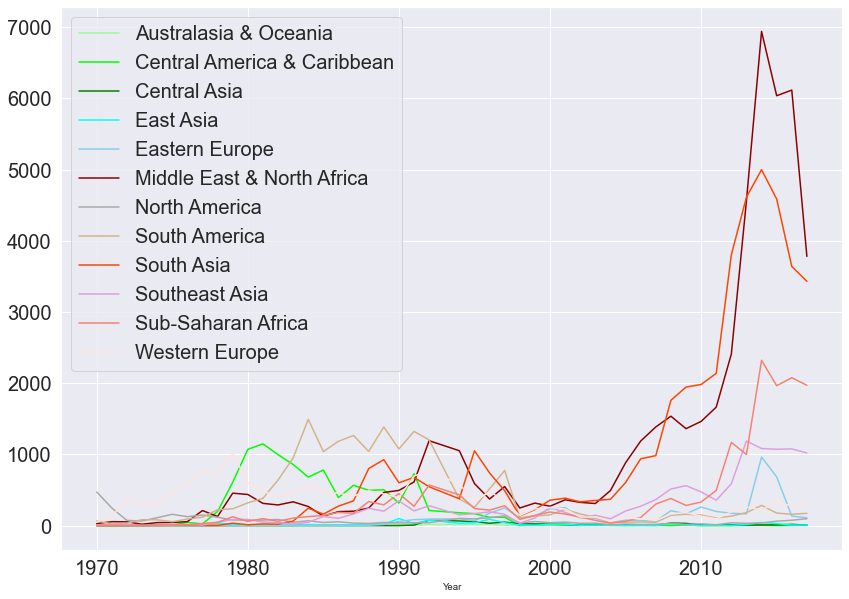

In [85]:
fig = plt.figure(figsize=(11, 10))
abc.plot(figsize = (14,10), fontsize = 20, color = color_list)
plt.legend(fontsize= 20)

In [86]:
sel_data['Year10'] = pd.cut(sel_data['Year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], labels=['1970–1980', '1980–1990', '1990–2000', '2000–2010', '2010–2020'])

<ipython-input-86-27cef4ba9512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_data['Year10'] = pd.cut(sel_data['Year'], bins=[1969, 1980, 1990, 2000, 2010, 2020], labels=['1970–1980', '1980–1990', '1990–2000', '2000–2010', '2010–2020'])


In [87]:
sel_data.head(2)

,Id,Year,country,region,provstate,city,latitude,longitude,success,attacktype,target_type,weapon_type,kill,wounded,Terrorist group,Year10
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D,1970–1980
1,197000000002,1970,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League,1970–1980


In [88]:
pqr = pd.crosstab(index = sel_data['Year10'] , columns = sel_data['region'])

In [89]:
pqr

region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year10,,,,,,,,,,,,
1970–1980,23,1988,0,79,27,1527,1671,1328,63,281,300,5289
1980–1990,89,6736,0,208,100,2940,520,10455,3460,1347,1968,4562
1990–2000,101,1545,356,336,1238,5201,658,4837,4596,1551,2429,3841
2000–2010,23,46,136,70,1353,9304,253,1147,9650,2924,1860,1286
2010–2020,46,29,71,109,2426,31502,354,1211,27205,6382,10993,1661


<Figure size 792x720 with 0 Axes>

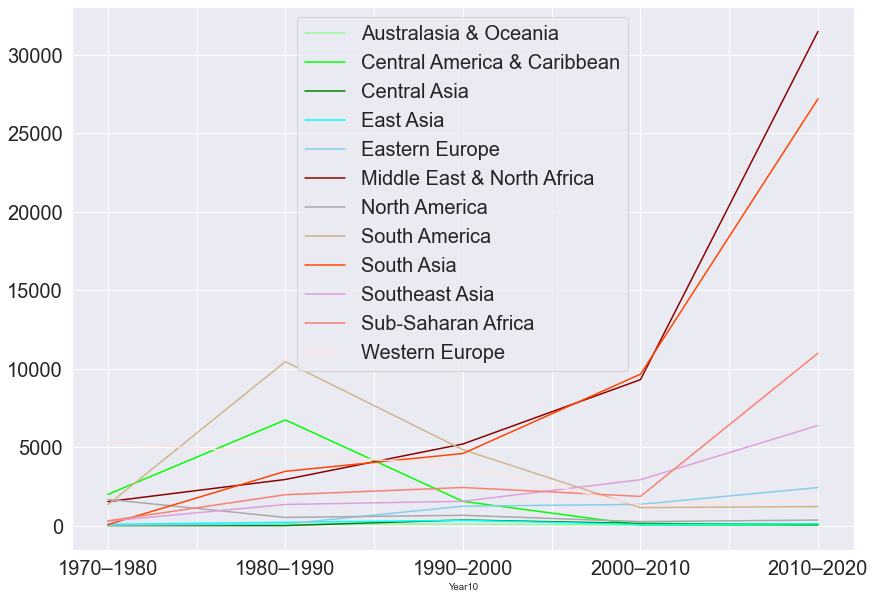

In [90]:
fig = plt.figure(figsize=(11, 10))
pqr.plot(figsize = (14,10), fontsize = 20, color = color_list)
plt.legend(fontsize= 20)

In [91]:
we = pd.crosstab(index = sel_data['Year10'] , columns = sel_data['weapon_type'])

In [92]:
we

weapon_type,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
Year10,,,,,,,,,,,,
1970–1980,0,35,5478,4,4127,1475,91,6,2,5,1351,2
1980–1990,8,21,14769,1,12661,1919,315,6,1,24,2651,9
1990–2000,1,65,10242,18,9651,2650,1163,32,10,11,2828,18
2000–2010,22,73,15536,6,8682,1483,566,17,1,44,1605,17
2010–2020,4,127,46401,4,23403,3608,1520,53,0,57,6722,90


<Figure size 792x720 with 0 Axes>

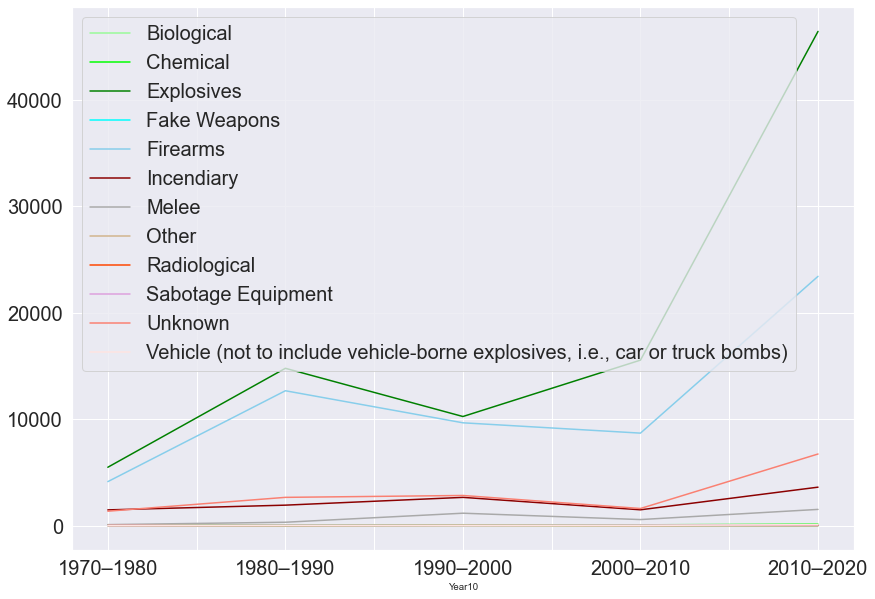

In [93]:
fig = plt.figure(figsize=(11, 10))
we.plot(figsize = (14,10), fontsize = 20, color = color_list)
plt.legend(fontsize= 20)

In [94]:
final_data.head(2)

,Id,Year,country,region,success,attacktype,target_type,weapon_type,Terrorist group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,1,Assassination,Private Citizens & Property,Unknown,MANO-D
1,197000000002,1970,Mexico,North America,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,23rd of September Communist League


In [95]:
a = final_data['Terrorist group'].value_counts().head(10)

Text(0, 0.5, 'No of attacks')

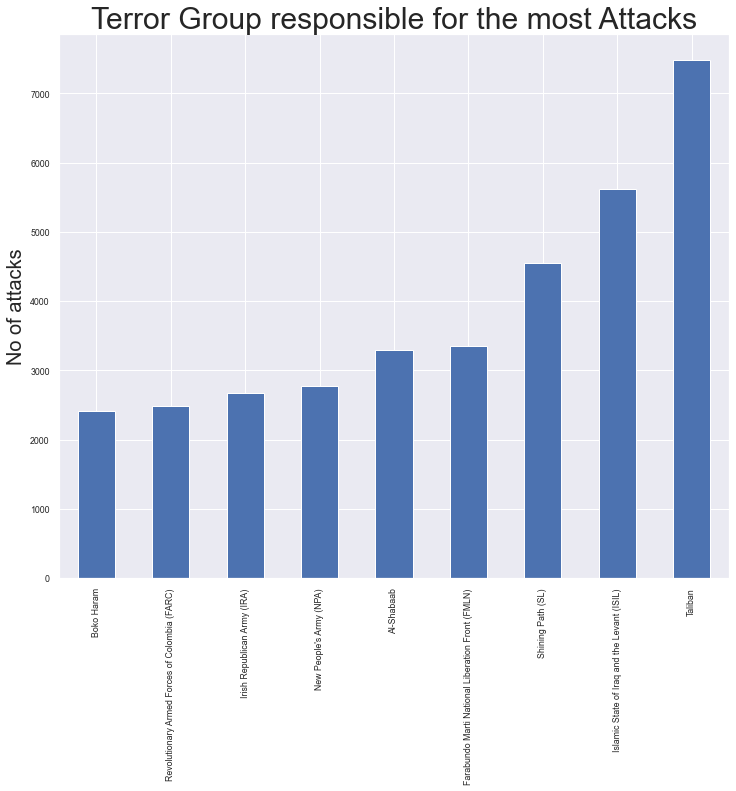

In [96]:
plt.figure(figsize=(12,10))
a.sort_values(ascending= True).head(9).plot(kind='bar')  
plt.title('Terror Group responsible for the most Attacks', fontsize = 30)
plt.ylabel('No of attacks', fontsize = 20)

#### ## Taliban is the terror group which is more responsible for the terror attacks

In [97]:
sel_data.head(5)

,Id,Year,country,region,provstate,city,latitude,longitude,success,attacktype,target_type,weapon_type,kill,wounded,Terrorist group,Year10
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D,1970–1980
1,197000000002,1970,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League,1970–1980
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown,1970–1980
3,197001000002,1970,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,Unknown,1970–1980
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,Unknown,1970–1980


Text(0, 0.5, 'No of attacks')

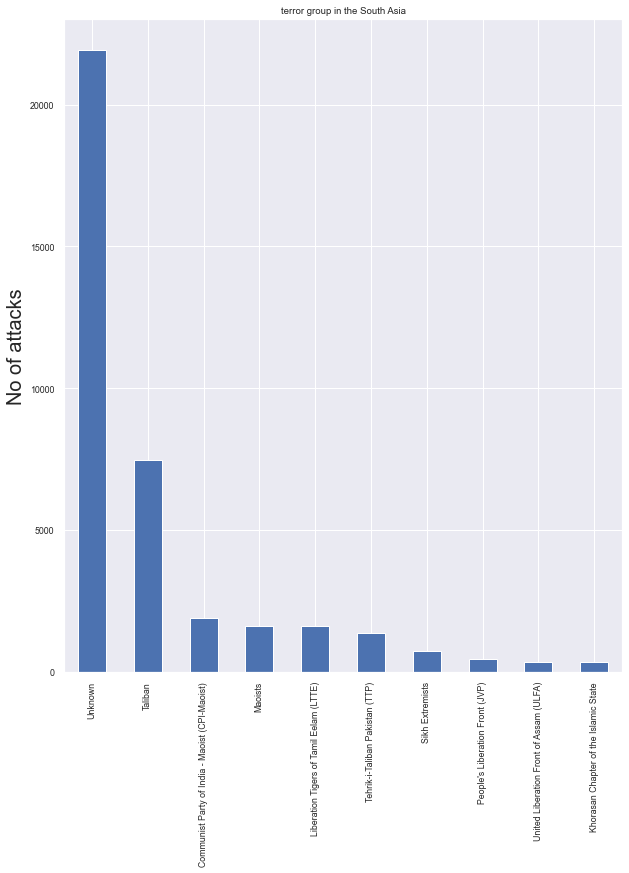

In [98]:
c = sel_data[sel_data['region']=='South Asia']
plt.figure(figsize=(10,12))
c['Terrorist group'].value_counts().head(10).plot(kind = 'bar')
plt.title('terror group in the South Asia') 
plt.ylabel('No of attacks', fontsize = 20)

  ###  Even in the South Asia ,Taliban is the terror group which is responsible for more attacks

#### People Affected due to the Terrorist Attacks

In [99]:
sel_data['Killed'] = sel_data['kill']+sel_data['wounded']
sel_data.head(3)

<ipython-input-99-4430741be2a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_data['Killed'] = sel_data['kill']+sel_data['wounded']


,Id,Year,country,region,provstate,city,latitude,longitude,success,attacktype,target_type,weapon_type,kill,wounded,Terrorist group,Year10,Killed
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D,1970–1980,1.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League,1970–1980,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown,1970–1980,1.0


In [100]:
abc= sel_data[sel_data['region']=='South Asia']


In [101]:
abc = abc.groupby('country').mean()['Killed'].sort_values(ascending = False).head(10)
abc = pd.DataFrame(abc).reset_index()


<AxesSubplot:xlabel='country', ylabel='Killed'>

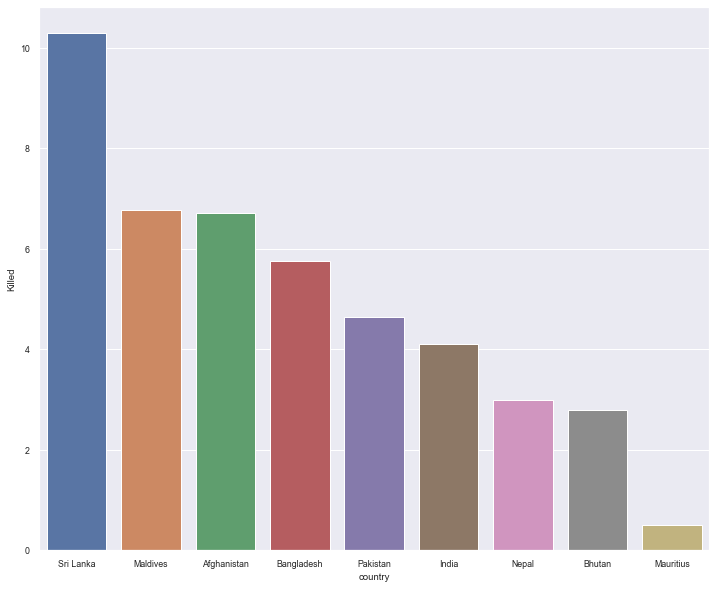

In [102]:

plt.figure(figsize = (12,10))

sns.barplot(x = abc['country'], y =abc['Killed'] , data = abc)


### People affected in a terrorist attack is highest in Sri-Lanka but total number of attacks in Sri-Lanka are very less compared to Afghanistan, Pakistan and India.